In [2]:
import numpy as np
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import time

In [3]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Runs an episode and return the total reward """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [4]:
def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

In [5]:
def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

In [6]:
def compute_policy_v(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

In [7]:
def policy_iteration(env, gamma = 1.0, max_iterations = 2000):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    gamma = 1.0
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if(np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy

In [138]:
if __name__ == '__main__':
    env_name  = 'FrozenLake8x8-v0'
    env = gym.make(env_name)
    optimal_policy = policy_iteration(env, gamma = 1.0, max_iterations=100)
    scores = evaluate_policy(env, optimal_policy, gamma = 1.0)
    print('Average scores = ', np.mean(scores))

Policy-Iteration converged at step 8.
Average scores =  0.84


In [147]:
env_name  = 'FrozenLake8x8-v0'
env = gym.make(env_name)
gamma = 1.0
max_iterations = 20
convergece_list = []
policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
for i in range(max_iterations):
    old_policy_v = compute_policy_v(env, policy, gamma)
    new_policy = extract_policy(old_policy_v, gamma)
    convergece = np.sum(np.fabs(policy - new_policy)) 
    convergece_list.append(convergece)
    #if(np.sum(np.fabs(policy - new_policy)) == 0):
    if(np.all(policy == new_policy)):
        #print ('Policy-Iteration converged at iteration %d.' %(i+1))
        continue
    policy = new_policy
         


In [148]:
convergece_list

[94.0,
 33.0,
 17.0,
 8.0,
 10.0,
 13.0,
 17.0,
 10.0,
 6.0,
 6.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

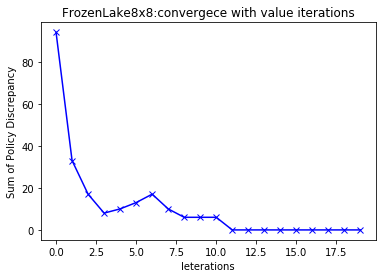

In [149]:
plt.plot(range(20), convergece_list, 'bx-')
plt.xlabel('Ieterations')
plt.ylabel('Sum of Policy Discrepancy')
plt.title('FrozenLake8x8:convergece with value iterations')
plt.show()

In [150]:
K = range(1,30)
render = False
reward_list = []
time_list = []
for max_iterations in K:
    start_time = time.time()
    if __name__ == '__main__':
        env_name  = 'FrozenLake8x8-v0'
        env = gym.make(env_name)
        number = max_iterations
        optimal_policy = policy_iteration(env, gamma = 1.0, max_iterations= number)
        scores = evaluate_policy(env, optimal_policy, gamma = 1.0)
        reward_list.append(scores)
        #print('Average scores = ', np.mean(scores))
        total_time = time.time() - start_time
        time_list.append(total_time)
      
       

Policy-Iteration converged at step 12.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 11.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 13.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 12.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.


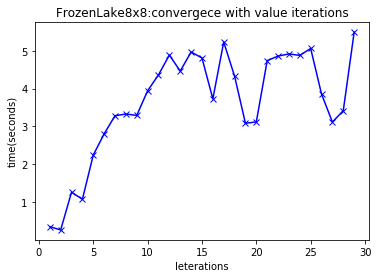

In [145]:
K = range(1,30)
plt.plot(K, time_list, 'bx-')
plt.xlabel('Ieterations')
plt.ylabel('time(seconds)')
plt.title('FrozenLake8x8:convergece with value iterations')
plt.show()

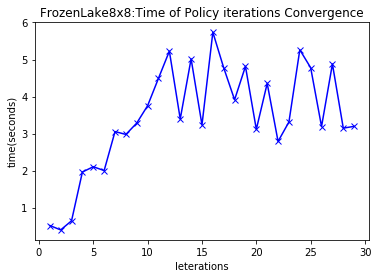

In [153]:
K = range(1,30)
plt.plot(K, time_list, 'bx-')
plt.xlabel('Ieterations')
plt.ylabel('time(seconds)')
plt.title('FrozenLake8x8:Time of Policy Iterations Convergence')
plt.show()

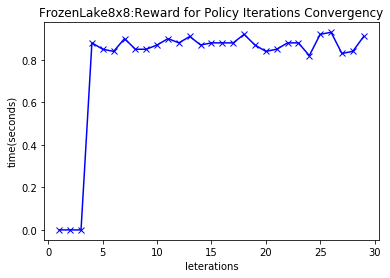

In [154]:
K = range(1,30)
plt.plot(K, reward_list, 'bx-')
plt.xlabel('Ieterations')
plt.ylabel('time(seconds)')
plt.title('FrozenLake8x8:Reward for Policy Iterations Convergency')
plt.show()

In [8]:
env_name2  = 'FrozenLake-v0'
env = gym.make(env_name2)
gamma = 1.0
max_iterations = 20
convergece_list = []
policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
for i in range(max_iterations):
    old_policy_v = compute_policy_v(env, policy, gamma)
    new_policy = extract_policy(old_policy_v, gamma)
    convergece = np.sum(np.fabs(policy - new_policy)) 
    convergece_list.append(convergece)
    #if(np.sum(np.fabs(policy - new_policy)) == 0):
    if(np.all(policy == new_policy)):
        #print ('Policy-Iteration converged at iteration %d.' %(i+1))
        continue
    policy = new_policy
         

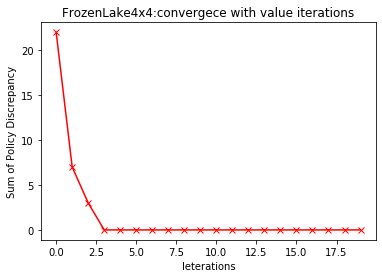

In [9]:
plt.plot(range(20), convergece_list, 'rx-')
plt.xlabel('Ieterations')
plt.ylabel('Sum of Policy Discrepancy')
plt.title('FrozenLake4x4:convergece with value iterations')
plt.show()

In [10]:
K = range(1,30)
render = False
reward_list = []
time_list = []
for max_iterations in K:
    start_time = time.time()
    if __name__ == '__main__':
        env_name  = 'FrozenLake-v0'
        env = gym.make(env_name)
        number = max_iterations
        optimal_policy = policy_iteration(env, gamma = 1.0, max_iterations= number)
        scores = evaluate_policy(env, optimal_policy, gamma = 1.0)
        reward_list.append(scores)
        #print('Average scores = ', np.mean(scores))
        total_time = time.time() - start_time
        time_list.append(total_time)
      

Policy-Iteration converged at step 4.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 5.
Policy-Iteration converged at step 3.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 5.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 3.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 6.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 3.
Policy-Iteration converged at step 4.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 7.
Policy-Iteration converged at step 5.


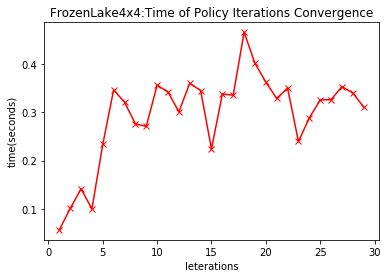

In [11]:
K = range(1,30)
plt.plot(K, time_list, 'rx-')
plt.xlabel('Ieterations')
plt.ylabel('time(seconds)')
plt.title('FrozenLake4x4:Time of Policy Iterations Convergence')
plt.show()

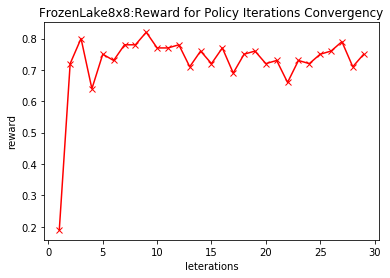

In [12]:
K = range(1,30)
plt.plot(K, reward_list, 'rx-')
plt.xlabel('Ieterations')
plt.ylabel('reward')
plt.title('FrozenLake8x8:Reward for Policy Iterations Convergency')
plt.show()